# Proba

## Questions
-  1. L'enfant aîné est une fille. Quelle est la probabilité que les deux enfants soient des filles ?
-  2. Au moins l'un des deux est une fille. Quelle est la probabilité que les deux enfants soient des filles ?

----

- Avec un tableau on aurait respectivement pour 1) et 2)
- sachant BG GG donc une chance sur 2 : 1/2
- sachant BG GG GB et donc : 1/3

## Moralité 

si on sait que au moins un des deux est une fille alors on a deux fois plus de chance que 
le deuxième enfant soit un garçon.


In [1]:
import random as r 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Constantes de l'étude
N = 1_000
NB_CHILD = 2
NB_PROBA = 3

In [3]:
both_girls = 0 # les deux sont des filles
older_girl = 0 # l'aîné est une fille
either_girl = 0 # au moins l'un des deux est une fille


def generate_kids():
    return r.choice(['boy', 'girl'])

for _ in range(N):
    younger = generate_kids()
    older = generate_kids()

    if older == "girl":
        older_girl += 1
    if older == "girl" and younger=="girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print("P(both | older )", both_girls/older_girl ) # proba 1/2
print("P(both | either)", both_girls/either_girl ) # proba 1/3


P(both | older ) 0.5269461077844312
P(both | either) 0.35436241610738256


In [4]:
np.random.choice(['girl', 'boy'], NB_CHILD)

array(['boy', 'boy'], dtype='<U4')

In [5]:
d = {
    'younger' : [ r.choice(['boy', 'girl']) for _ in range(N) ],
    'older' :  [ r.choice(['boy', 'girl']) for _  in range(N) ]
}

df = pd.DataFrame(d)

# DataFrame
df['both_girls'] = ( (df['younger'] == 'girl') &  ( df['older'] == 'girl' )).astype('int64')
df['older_girl'] =  (df['older'] == 'girl').astype('int64')
df['either_girl'] = ((df['younger'] == 'girl') |  ( df['older'] == 'girl' )).astype('int64')
df.tail()

,younger,older,both_girls,older_girl,either_girl
995,girl,girl,1,1,1
996,girl,girl,1,1,1
997,girl,girl,1,1,1
998,girl,boy,0,0,1
999,girl,girl,1,1,1


In [6]:
#Calcul des proba
POlderBoth = df.both_girls.sum()/df.older_girl.sum() 
POlderEither = df.both_girls.sum()/df.either_girl.sum()

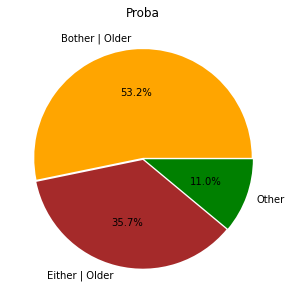

In [79]:
colors = ['orange', 'brown', 'green']
fig, ax = plt.subplots(figsize=(10, 5))

explode=(0.01, ) * NB_PROBA

ax.pie([POlderBoth, POlderEither, 1 - (POlderBoth + POlderEither)], labels=[
    'Bother | Older', 'Either | Older', 'Other'
], colors=colors, 
autopct='%1.1f%%', textprops={'color': "black"}, explode=explode)
ax.set_title('Proba')


plt.show();

In [88]:
# Généralisation
def simulate():
    d = {
        'younger' : [ r.choice(['boy', 'girl']) for _ in range(N) ],
        'older' :  [ r.choice(['boy', 'girl']) for _  in range(N) ]
    }

    df = pd.DataFrame(d)

    # DataFrame
    df['both_girls'] = ( (df['younger'] == 'girl') &  ( df['older'] == 'girl' )).astype('int64')
    df['older_girl'] =  (df['older'] == 'girl').astype('int64')
    df['either_girl'] = ((df['younger'] == 'girl') |  ( df['older'] == 'girl' )).astype('int64')
    
    POlderBoth = df.both_girls.sum()/df.older_girl.sum() 
    POlderEither = df.both_girls.sum()/df.either_girl.sum()
    
    return ( POlderBoth, POlderEither )



In [87]:
# Générate proba
print( simulate() )


{0.5120967741935484, 0.34185733512786004}


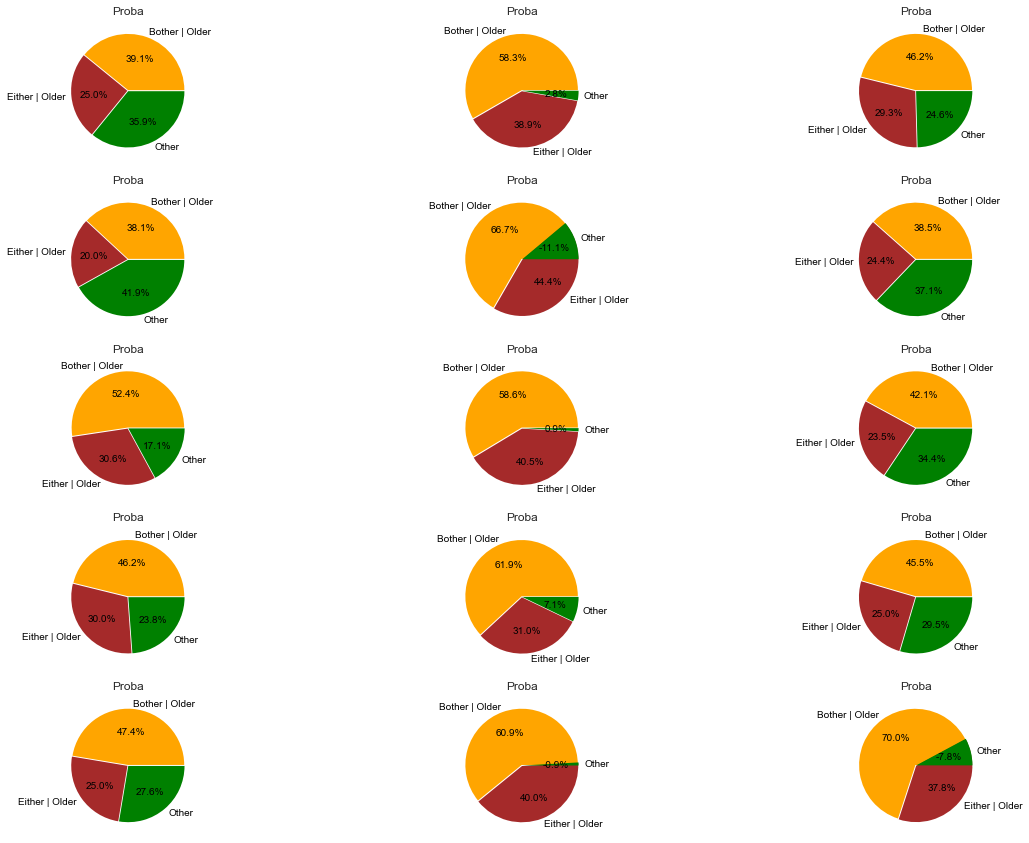

In [98]:
colors = ['orange', 'brown', 'green']
fig, ax = plt.subplots(5, 3, figsize=(20, 15))

explode=(0.01, ) * 3


for i in range(5):
    for j in range(3):
        (POlderBoth, POlderEither) = simulate()
        ax[i, j].pie([POlderBoth, POlderEither, 1 - (POlderBoth + POlderEither)], labels=[
            'Bother | Older', 'Either | Older', 'Other'
        ], colors=colors, 
        autopct='%1.1f%%', textprops={'color': "black"}, explode=explode)
        ax[i, j].set_title('Proba')


plt.show();

In [ ]:
# Générez un dataset de la proba estimé POlderBoth puis faite un histogramme 